In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset from a file in Google Colab
from google.colab import files
uploaded = files.upload()

# Assuming the file is named 'Dataset.csv'
dataset = pd.read_csv('Dataset.csv')

# Dropping unnecessary columns
dataset = dataset.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Encoding categorical variables
label_encoders = {}
for column in ['Geography', 'Gender', 'Card Type']:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le

# Splitting the data into features and target
X = dataset.drop(columns=['Exited'])
y = dataset['Exited']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Saving Dataset.csv to Dataset (1).csv


In [8]:
# Dictionary to store the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100),
    "Naive Bayes": GaussianNB()
}

# Dictionary to store the evaluation metrics for each model
results = {}

# Training and evaluating each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)


                        Accuracy  Precision    Recall  F1-Score
Logistic Regression        0.999   0.997455  0.997455  0.997455
Decision Tree              0.998   0.992405  0.997455  0.994924
Random Forest              0.999   0.997455  0.997455  0.997455
Support Vector Machine     0.999   0.997455  0.997455  0.997455
K-Nearest Neighbors        0.997   0.997429  0.987277  0.992327
Gradient Boosting          0.998   0.992405  0.997455  0.994924
XGBoost                    0.999   0.997455  0.997455  0.997455
Naive Bayes                0.999   0.997455  0.997455  0.997455


In [9]:
# Print the results in a sorted manner by F1-Score
print(results_df.sort_values(by="F1-Score", ascending=False))


                        Accuracy  Precision    Recall  F1-Score
Logistic Regression        0.999   0.997455  0.997455  0.997455
Random Forest              0.999   0.997455  0.997455  0.997455
Support Vector Machine     0.999   0.997455  0.997455  0.997455
XGBoost                    0.999   0.997455  0.997455  0.997455
Naive Bayes                0.999   0.997455  0.997455  0.997455
Decision Tree              0.998   0.992405  0.997455  0.994924
Gradient Boosting          0.998   0.992405  0.997455  0.994924
K-Nearest Neighbors        0.997   0.997429  0.987277  0.992327


Feature Importance Analysis

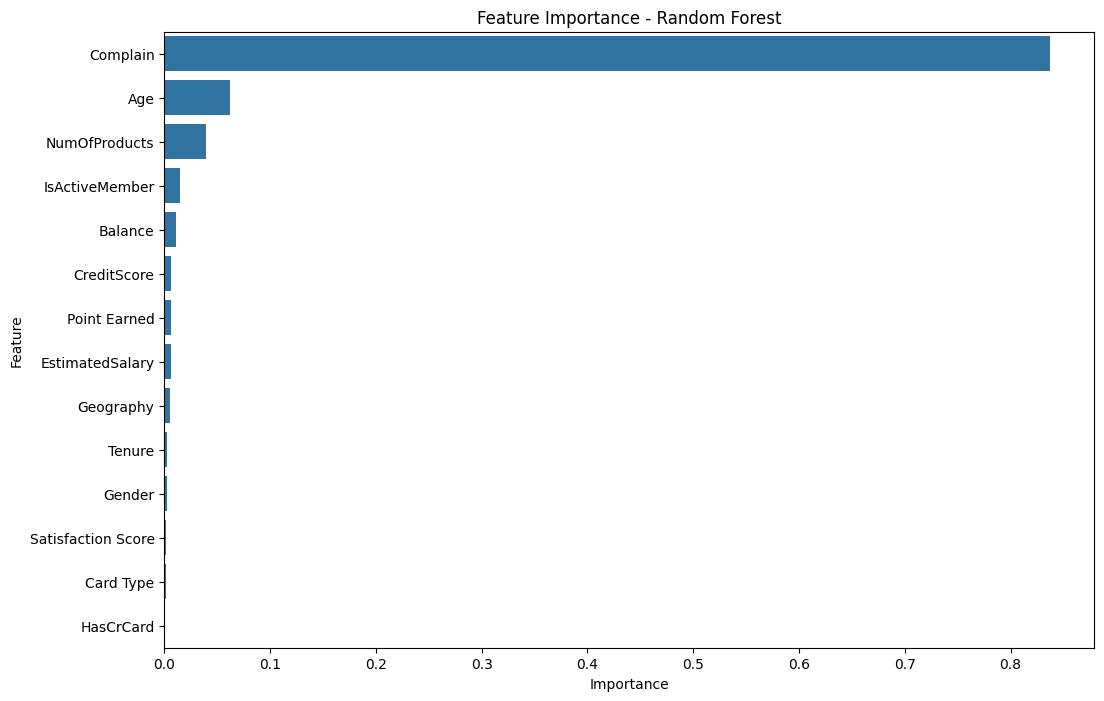

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from Random Forest
model = models["Random Forest"]
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()


Confusion Matrix

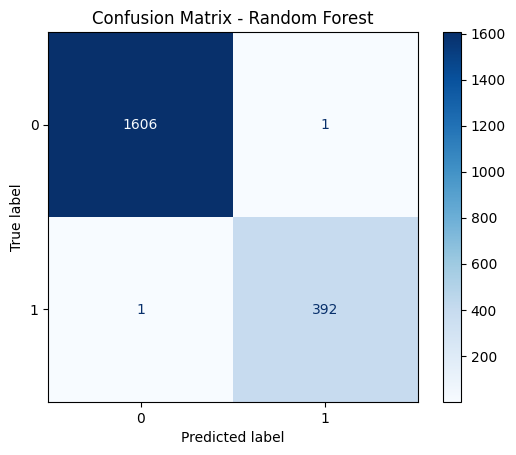

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix for the best model (assuming Random Forest here)
best_model = models["Random Forest"]
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()


Hyperparameter Tuning (using GridSearchCV for Random Forest as an example)

In [13]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1-Score: 0.9963592125635921
